In [1]:
from openai import OpenAI
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import gc
from openai import OpenAIError, RateLimitError

from matplotlib import rcParams
# 한글 폰트 설정
rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕으로 설정
rcParams['axes.unicode_minus'] = False     # 음수 기호 문제 해결

In [2]:
# APIKEY 정의
api_key = "" # dybaek9_1
client = OpenAI(api_key=api_key)

In [3]:
# EXCEL파일 읽기
file_path = './Text_Data/bigkinds/삼성전자_정치_20170901-20240830_전처리후.xlsx'
df_bigkinds = pd.read_excel(file_path, converters={'뉴스 식별자': str})  # '뉴스 식별자'는 해당 열의 실제 이름으로 대체

In [4]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후,제목_키워드_전처리후_Okt,제목_키워드_전처리후_Hannanum,제목_키워드_전처리후_Kkma,제목_키워드_전처리후_Komoran,제목_키워드_전처리후_kiwi,제목_키워드_전처리후_Komoran_명사
0,2.100101e+06,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10개월만에 문고리 실세 이재만 안봉근 법정 나와 청문회불출석 인정 두문불...,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,두문불출 10개월 만에 문고리 실세 이재 만 안봉근 법정 청문회불출석 인정 두문불출...,두문불출 10 개월 만 문고리 실세 이재 만 알 ㄴ 봉 근 법정 나오 청문회 불 출...,두문불출 10 개월 만 문고리 실세 이재만 안 봉 근 법정 나오 청문회 불 출석 인...,두문불출 10 개월 문고리 실세 이재만 안봉근 법정 청문회 출석 인정 두문불출 개월...,두문불출 개월 문고리 실세 이재만 안 봉 근 법정 청문회 출석 인정 두문불출 개월 ...
1,2.100101e+06,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최순실게이트 청문회 불출석 11인 중 8명 백수 불출석 최순실게이트 청문회 백수 문...,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,최순실게이트 청문회 불출석 11 ㄴ 중 8명 백수 불출석 최순실게이트 청문회 백수 ...,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백 수 불 출석 최 순 실 게...,최순 실 게이트 청문회 불 출석 11 ㄴ 중 8 명 백수 불 출석 최순 실 게이트 ...,최순실 게이트 청문회 출석 11 백수 출석 최순실 게이트 청문회 백수 문고리 안봉근...,최순 실 게이트 청문회 출석 중 명 백수 출석 최순 실 게이트 청문회 백수 문고리 ...
2,2.100311e+06,2017-09-01,서울경제,장주영 기자,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장",정치>국회_정당,사회>사건_사고,정치>청와대,NaN,NaN,...,http://www.sedaily.com/NewsView/1OKUY3ELL1,NaN,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장 혐의,청문회,건강상태,절...",청문회 불출석 혐의 건강상태-절차적 하자로 무죄 주장 혐의 청문회 건강상태 절차적 ...,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,청문회 불출석 혐의 건강상태 - 절차적 하자 무죄 주장 혐의 청문회 건강상태 절차적...,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,청문회 출석 혐의 건강 상태 절차 하자 주장 혐의 청문회 건강 상태 절차 하자 무죄...,청문회 출석 혐의 건강 상태 절차 하자 무죄 주장 혐의 청문회 건강 상태 절차 무죄...
3,2.100101e+06,2017-09-02,매일경제,디지털뉴스국,서울 도심 곳곳서 태극기 집회,정치>청와대,정치>행정_자치,정치>선거,사회>사회갈등>시위,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"서울 도심 곳곳서 태극기 집회 서울,도심,태극기,집회,주말,도심,서울,도심,박근혜,...",서울 도심 곳곳서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜 ...,서울 도심 곳곳 서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜...,서울 돌 시ㅁ 곳곳 서 태극기 집회 서울 도 시ㅁ 태극기 집회 주말 도 시ㅁ 서울 ...,서울 도심 곳곳 서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근 ...,서울 도심 곳곳 서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜...,서울 도심 곳곳 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜 단...,서울 도심 곳곳 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜 단...
4,2.100101e+06,2017-09-04,매일경제,고득관,"코스피, 북핵 리스크에 2330선 `털썩`",정치>북한,정치>청와대,NaN,범죄>기업범죄>거래제한,재해>자연재해>지진,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"코스피, 북핵 리스크에 2330선 `털썩` 코스피,리스크,2330선,북한,지정학,리...",코스피 북핵 리스크에 2330선 털썩 코스피 리스크 2330선 북한 지정학 리스크 ...,코스피 북핵 리스크 2330 선 털썩 코스피 리스크 2330 선 북한 지정학 리스크...,코스피 북핵 리스크 2330 선 털썩 코스피 리스크 2330 선 북한 지정학 리스크...,코스 피 북 핵 리스크 2330 선 털썩 코스 피 리스크 2330 선 북 ㄴ 지정학...,코스 피 북 핵 리스크 2330 선 털썩 코스 피 리스크 2330 선 북한 지정학 ...,코스피 북핵 리스크 2330 코스피 리스크 2330 북한 지정학 리스크 고조 코스피...,코스 피 북 핵 리스크 선 코스 피 리스크 선 북한 지정학 리스크 고조 코스 피 급...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,2.100101e+06,2024-08-29,매일경제,이호준 매경이코노미 인턴기자(lhj0756@naver.com),재산 333억원에 페라리 소유...국회의원 재산신고 1위 누구?,정치>국회_정당,정치>선거,NaN,NaN,NaN,...,http://www.mk.co.kr/article/11104605,NaN,"재산 333억원에 페라리 소유...국회의원 재산신고 1위 누구? 재산,페라리,소유,...",재산 333억원에 페라리 소유...국회의원 재산신고 1위 누구 재산 페라리 소유 국...,재산 333억원 페라리 소유 국회의원 재산 신고 1 위 재산 페라리 소유 국회의원 ...,재산 333억원 페라리 소유 국회의원 재산신고 1위 재산 페라리 소유 국회의원 재산...,재산 333 억 원 페라리 소유 국회 의원 재산 신고 1 위 누 재산 페라리 소유 ...,재산 333 억 원 페라리 소유 국회의원 재산 신고 1 위 재산 페라리 소유 국회의...,재산 333 페라리 소유 국회 의원 재산 신고 재산 페라리 소유 국회 의원 재산 신...,재산 원 페라리 소유 국회의원 재산 신고 위 재산 페라리 소유 국회의원 재산 신고 ...
5408,2.100311e+06,2024-08-29,서울경제,김예솔 기자,신규 국회의원 평균재산 27억 고동진 333억 '최고',정치>국회_정당,정치>선거,NaN,NaN,NaN,...,http://www.sedaily.com/NewsView/2DD7CNUYYS,NaN,"신규 국회의원 평균재산 27억 고동진 333억 '최고' 신규,국회의원,평균,재산,고...",신규 국회의원 평균재산 27억 고동진 333억 최고 신규 국회의원 평균 재산 고동진...,신규 국회의원 평균 재산 27억 고동진 333억 최고 신규 국회의원 평균 재산 고동...,신규 국회의원 평균재

In [5]:
df_bigkinds.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후',
       '제목_키워드_전처리후_Okt', '제목_키워드_전처리후_Hannanum', '제목_키워드_전처리후_Kkma',
       '제목_키워드_전처리후_Komoran', '제목_키워드_전처리후_kiwi', '제목_키워드_전처리후_Komoran_명사'],
      dtype='object')

In [6]:
df_bigkinds['제목_키워드_전처리후_Okt']

0       두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...
1       최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...
2       청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...
3       서울 도심 곳곳 서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜...
4       코스피 북핵 리스크 2330 선 털썩 코스피 리스크 2330 선 북한 지정학 리스크...
                              ...                        
5407    재산 333억원 페라리 소유 국회의원 재산 신고 1 위 재산 페라리 소유 국회의원 ...
5408    신규 국회의원 평균 재산 27억 고동진 333억 최고 신규 국회의원 평균 재산 고동...
5409    22 대 국회 신규 등록 최고 부자 는 333억 고동진 조국 52억 이준석 12억 ...
5410    333억 고동진 22 대 초선 재산 1 위 333억 고동진 초선 재산 국회 입성 국...
5411    고동진 37억 박수민 34억 새내기 의원 10 명 주식 큰손 고동진 박수민 새내기 ...
Name: 제목_키워드_전처리후_Okt, Length: 5412, dtype: object

In [7]:
# chatgpt - 원래 소스 대비 10배 빨라지며 50개 샘플링으로 테스트시 sentiments 동일/predicted_texts는 상이할 수 있으나
# 원래 소스도 재실행시 상이
# 개선사항
# 1. 병렬 처리: ThreadPoolExecutor를 사용하여 동시에 여러 요청을 보낼 수 있도록 했습니다. 이렇게 하면 처리 속도가 병목 현상 없이 크게 개선됩니다.
# 2. 딜레이 최적화: RateLimitError가 발생할 때 10초를 기다리는 대신, 1초 대기 후 재시도하도록 수정했습니다. 이렇게 하면 딜레이로 인한 비효율을 줄일 수 있습니다.
# 3. 오류 처리: RateLimitError 외의 예외가 발생할 경우도 안전하게 처리하여 실행이 중단되지 않도록 했습니다.
# 4. 결과 정리: sentiments와 predicted_texts 리스트를 오류 없이 저장할 수 있도록 수정했습니다.

import concurrent.futures
import time
from tqdm import tqdm

def analyze_text_impact(text):
    """
    주어진 텍스트가 삼성전자 주가에 미칠 영향을 분석하는 함수
    """
    prompt = f"""
    이전 지시사항을 모두 잊으세요. 당신은 주식 추천 경험이 있는 금융 전문가라고 가정하세요.
    -1에서 1 사이의 숫자로 응답하세요. -1은 매우 나쁜 소식, 0은 중립적이거나 불확실한 소식, 1은 매우 좋은 소식을 의미합니다. 소수점 한 자리까지 사용할 수 있습니다.
    첫 줄에 숫자로 답하고, 그 다음 줄에 한 문장으로 간결하게 설명하세요.
    이 텍스트는 앞으로 10일 동안에 삼성전자의 주가에 어떤 영향을 미칠까요?
    텍스트: {text}
    """
    model = "gpt-4o-mini"
    messages = [
        {"role": "user", "content": prompt}
    ]
    while True:
        try:
            # API 호출
            response = client.chat.completions.create(
                model=model,        
                messages=messages,    
                max_tokens=50,        
                temperature=0        
            )
            result = response.choices[0].message.content
            sentiment, predicted_text = result.split('\n', 1)
            return float(sentiment.strip()), predicted_text.strip()  # 값 정리
        except RateLimitError as e:
            print(f"Rate limit reached: {e}. Retrying in 1 second...")
            time.sleep(1)  # 대기 시간을 1초로 줄임
        except Exception as e:
            print(f"An error occurred: {e}")
            return None, None  # 오류 처리

# 텍스트 분석을 병렬로 처리
def analyze_texts_in_parallel(text_list):
    results = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(analyze_text_impact, text_list), total=len(text_list)))
    return results

# 분석할 텍스트 리스트
text_list = df_bigkinds['제목_키워드_전처리후_Okt'].tolist()

# 병렬 처리를 통한 결과 분석
results = analyze_texts_in_parallel(text_list)

# 결과 저장
sentiments = [result[0] for result in results if result[0] is not None]
predicted_texts = [result[1] for result in results if result[1] is not None]

100%|██████████████████████████████████████████████████████████████████████████████| 5412/5412 [07:46<00:00, 11.60it/s]


In [8]:
# 결과를 데이터프레임에 추가
df_bigkinds['GPT_Sentiment'] = sentiments
df_bigkinds['Predicted_Text'] = predicted_texts

In [9]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,제목_키워드,제목_키워드_전처리후,제목_키워드_전처리후_Okt,제목_키워드_전처리후_Hannanum,제목_키워드_전처리후_Kkma,제목_키워드_전처리후_Komoran,제목_키워드_전처리후_kiwi,제목_키워드_전처리후_Komoran_명사,GPT_Sentiment,Predicted_Text
0,2.100101e+06,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10개월만에 문고리 실세 이재만 안봉근 법정 나와 청문회불출석 인정 두문불...,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,두문불출 10개월 만에 문고리 실세 이재 만 안봉근 법정 청문회불출석 인정 두문불출...,두문불출 10 개월 만 문고리 실세 이재 만 알 ㄴ 봉 근 법정 나오 청문회 불 출...,두문불출 10 개월 만 문고리 실세 이재만 안 봉 근 법정 나오 청문회 불 출석 인...,두문불출 10 개월 문고리 실세 이재만 안봉근 법정 청문회 출석 인정 두문불출 개월...,두문불출 개월 문고리 실세 이재만 안 봉 근 법정 청문회 출석 인정 두문불출 개월 ...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
1,2.100101e+06,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최순실게이트 청문회 불출석 11인 중 8명 백수 불출석 최순실게이트 청문회 백수 문...,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,최순실게이트 청문회 불출석 11 ㄴ 중 8명 백수 불출석 최순실게이트 청문회 백수 ...,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백 수 불 출석 최 순 실 게...,최순 실 게이트 청문회 불 출석 11 ㄴ 중 8 명 백수 불 출석 최순 실 게이트 ...,최순실 게이트 청문회 출석 11 백수 출석 최순실 게이트 청문회 백수 문고리 안봉근...,최순 실 게이트 청문회 출석 중 명 백수 출석 최순 실 게이트 청문회 백수 문고리 ...,0.0,"이 사건은 삼성과 관련된 정치적 불확실성을 증가시키고 있으며, 주가에 미치는 영향이..."
2,2.100311e+06,2017-09-01,서울경제,장주영 기자,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장",정치>국회_정당,사회>사건_사고,정치>청와대,NaN,NaN,...,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장 혐의,청문회,건강상태,절...",청문회 불출석 혐의 건강상태-절차적 하자로 무죄 주장 혐의 청문회 건강상태 절차적 ...,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,청문회 불출석 혐의 건강상태 - 절차적 하자 무죄 주장 혐의 청문회 건강상태 절차적...,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,청문회 출석 혐의 건강 상태 절차 하자 주장 혐의 청문회 건강 상태 절차 하자 무죄...,청문회 출석 혐의 건강 상태 절차 하자 무죄 주장 혐의 청문회 건강 상태 절차 무죄...,0.0,"이 텍스트는 삼성전자의 주가에 대한 명확한 긍정적 또는 부정적 영향을 주지 않으며,..."
3,2.100101e+06,2017-09-02,매일경제,디지털뉴스국,서울 도심 곳곳서 태극기 집회,정치>청와대,정치>행정_자치,정치>선거,사회>사회갈등>시위,NaN,...,"서울 도심 곳곳서 태극기 집회 서울,도심,태극기,집회,주말,도심,서울,도심,박근혜,...",서울 도심 곳곳서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜 ...,서울 도심 곳곳 서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜...,서울 돌 시ㅁ 곳곳 서 태극기 집회 서울 도 시ㅁ 태극기 집회 주말 도 시ㅁ 서울 ...,서울 도심 곳곳 서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근 ...,서울 도심 곳곳 서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜...,서울 도심 곳곳 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜 단...,서울 도심 곳곳 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜 단...,0.0,"이 텍스트는 정치적 불안정성을 반영하고 있으며, 삼성전자의 주가에 중립적이거나 불확..."
4,2.100101e+06,2017-09-04,매일경제,고득관,"코스피, 북핵 리스크에 2330선 `털썩`",정치>북한,정치>청와대,NaN,범죄>기업범죄>거래제한,재해>자연재해>지진,...,"코스피, 북핵 리스크에 2330선 `털썩` 코스피,리스크,2330선,북한,지정학,리...",코스피 북핵 리스크에 2330선 털썩 코스피 리스크 2330선 북한 지정학 리스크 ...,코스피 북핵 리스크 2330 선 털썩 코스피 리스크 2330 선 북한 지정학 리스크...,코스피 북핵 리스크 2330 선 털썩 코스피 리스크 2330 선 북한 지정학 리스크...,코스 피 북 핵 리스크 2330 선 털썩 코스 피 리스크 2330 선 북 ㄴ 지정학...,코스 피 북 핵 리스크 2330 선 털썩 코스 피 리스크 2330 선 북한 지정학 ...,코스피 북핵 리스크 2330 코스피 리스크 2330 북한 지정학 리스크 고조 코스피...,코스 피 북 핵 리스크 선 코스 피 리스크 선 북한 지정학 리스크 고조 코스 피 급...,-1.0,북한의 핵실험과 지정학적 리스크가 고조되면서 삼성전자를 포함한 코스피 시장에 부정적...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,2.100101e+06,2024-08-29,매일경제,이호준 매경이코노미 인턴기자(lhj0756@naver.com),재산 333억원에 페라리 소유...국회의원 재산신고 1위 누구?,정치>국회_정당,정치>선거,NaN,NaN,NaN,...,"재산 333억원에 페라리 소유...국회의원 재산신고 1위 누구? 재산,페라리,소유,...",재산 333억원에 페라리 소유...국회의원 재산신고 1위 누구 재산 페라리 소유 국...,재산 333억원 페라리 소유 국회의원 재산 신고 1 위 재산 페라리 소유 국회의원 ...,재산 333억원 페라리 소유 국회의원 재산신고 1위 재산 페라리 소유 국회의원 재산...,재산 333 억 원 페라리 소유 국회 의원 재산 신고 1 위 누 재산 페라리 소유 ...,재산 333 억 원 페라리 소유 국회의원 재산 신고 1 위 재산 페라리 소유 국회의...,재산 333 페라리 소유 국회 의원 재산 신고 재산 페라리 소유 국회 의원 재산 신...,재산 원 페라리 소유 국회의원 재산 신고 위 재산 페라리 소유 국회의원 재산 신고 ...,0.0,"이 텍스트는 삼성전자의 주가에 직접적인 영향을 미치지 않으며, 정치적 재산 신고와 ..."
5408,2.100311e+06,2024-08-29,서울경제,김예솔 기자,신규 국회의원 평균재산 27억 고동진 333억 '최고',정치>국회_정당,정치>선거,NaN,NaN,NaN,...,"신규 국회의원 평균재산 27억 고동진 333억 '최고' 신규,국회의원,평균,재산,고...",신규 국회의원 평균재산 27억 고동진 333억 최고 신규 국회의원 평균 재산 고동진...,신규 국회의원 평균 재산 27억 고동진 333억 최고 신규 국회의원 평균 재산 고동...,신규 국회의원 평균

In [10]:
df_bigkinds.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후',
       '제목_키워드_전처리후_Okt', '제목_키워드_전처리후_Hannanum', '제목_키워드_전처리후_Kkma',
       '제목_키워드_전처리후_Komoran', '제목_키워드_전처리후_kiwi', '제목_키워드_전처리후_Komoran_명사',
       'GPT_Sentiment', 'Predicted_Text'],
      dtype='object')

In [11]:
# 원하는 열만 선택하여 새로운 데이터프레임 생성
df_bigkinds = df_bigkinds[['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2','통합 분류3',
                           '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
                           '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후_Okt',
                           'GPT_Sentiment', 'Predicted_Text']]

In [12]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_Okt,GPT_Sentiment,Predicted_Text
0,2.100101e+06,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,"서울지방경찰청,형사12단독,검찰,국회,서울중앙지법,이화여대,청와대,국정홍보비서관,서...","두문불출,개월,문고리,실세,이재만,안봉근,법정,청문회불,출석,인정,박근혜,대통령,6...","비서관,청문회,이재만,문고리,불출석,청와대,변호인,서울중앙지법,피고인,박평수,박근혜...",박근혜 전 대통령(65 구속기소)의 '문고리 3인방'으로 불렸던 최측근 이재만 전 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
1,2.100101e+06,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,"검찰,서울경찰청,국회,비서관,국정원,대법원,서울중앙지법,이화여대,국회증언감정법,청와...","불출석,최순실게이트,청문회,백수,문고리,안봉근,국정홍보비서관,이재만,총무비서관,국정...","비서관,청문회,재판부,최순실,공소사실,문고리,불출석,이화여대,삼성전자,김장자,피고인...",이른바 '문고리 3인방'으로 알려진 안봉근 전 국정홍보비서관과 이재만 전 총무비서관...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,0.0,"이 사건은 삼성과 관련된 정치적 불확실성을 증가시키고 있으며, 주가에 미치는 영향이..."
2,2.100311e+06,2017-09-01,서울경제,장주영 기자,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장",정치>국회_정당,사회>사건_사고,정치>청와대,NaN,NaN,...,"형사3부,서울지방경찰청,형사12단독,검찰,국회,대법원,국정원,순천향대,특위,한국마사...","혐의,청문회,건강상태,절차적,하자,무죄,주장,국회,국정,농단,청문회,불출석,혐의,재...","청문회,청와대,비서관,국정원,요구서,건강상태,출석요구서,한국마사회,불출석,재판장,서...",지난해말 국회에서 열린 국정농단 청문회에 제멋대로 불출석한 혐의로 재판에 넘겨진 우...,http://www.sedaily.com/NewsView/1OKUY3ELL1,NaN,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장 혐의,청문회,건강상태,절...",청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,0.0,"이 텍스트는 삼성전자의 주가에 대한 명확한 긍정적 또는 부정적 영향을 주지 않으며,..."
3,2.100101e+06,2017-09-02,매일경제,디지털뉴스국,서울 도심 곳곳서 태극기 집회,정치>청와대,정치>행정_자치,정치>선거,사회>사회갈등>시위,NaN,...,"정부,헌법재판소,자유한국당,태극기,대한애국당,박근혜구명총연맹,국립현대미술관,태극기혁...","서울,도심,태극기,집회,주말,도심,서울,도심,박근혜,단체들,대통령,지지,단체,태극기...","태극기,대한애국당,문재인,박근혜,서울,대한문,종로구,종로,부회장,참가자,조원진,중구...",주말인 2일 서울 도심 곳곳에서 박근혜 전 대통령 지지 단체들의 '태극기 집회'가 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"서울 도심 곳곳서 태극기 집회 서울,도심,태극기,집회,주말,도심,서울,도심,박근혜,...",서울 도심 곳곳 서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜...,0.0,"이 텍스트는 정치적 불안정성을 반영하고 있으며, 삼성전자의 주가에 중립적이거나 불확..."
4,2.100101e+06,2017-09-04,매일경제,고득관,"코스피, 북핵 리스크에 2330선 `털썩`",정치>북한,정치>청와대,NaN,범죄>기업범죄>거래제한,재해>자연재해>지진,...,"미국,한국전력,국방부,국가안보회의,조선노동당,기상청,북한,국가지진화산종합상황실,유가...","코스피,리스크,2330선,북한,지정학,리스크,고조,코스피,급락세,4일,코스피,25....","코스피,미국,인공지진,5차,풍계리,함경북도,수소탄,제임스,핵무력,기상청",북한의 6차 핵실험으로 지정학적 리스크가 다시 고조되자 코스피도 급락세를 보이고 있...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"코스피, 북핵 리스크에 2330선 `털썩` 코스피,리스크,2330선,북한,지정학,리...",코스피 북핵 리스크 2330 선 털썩 코스피 리스크 2330 선 북한 지정학 리스크...,-1.0,북한의 핵실험과 지정학적 리스크가 고조되면서 삼성전자를 포함한 코스피 시장에 부정적...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,2.100101e+06,2024-08-29,매일경제,이호준 매경이코노미 인턴기자(lhj0756@naver.com),재산 333억원에 페라리 소유...국회의원 재산신고 1위 누구?,정치>국회_정당,정치>선거,NaN,NaN,NaN,...,"민주당,사회민주당,국회공직자윤리위원회,조국혁신당,진보당,개혁신당,더불어민주당,페라리...","재산,페라리,소유,국회의원,재산,신고,공개,국회공직자,윤리,위원회,신규,재산,등록,...","국민의힘,1억,국회의원,배우자,페라리,26억,신고액,국회공직자윤리위원회,더불어민주당...",국회공직자윤리위원회 신규 재산 등록내역 공개 \n22대 국회 신규 등록 국회의원 \...,http://www.mk.co.kr/article/11104605,NaN,"재산 333억원에 페라리 소유...국회의원 재산신고 1위 누구? 재산,페라리,소유,...",재산 333억원 페라리 소유 국회의원 재산 신고 1 위 재산 페라리 소유 국회의원 ...,0.0,"이 텍스트는 삼성전자의 주가에 직접적인 영향을 미치지 않으며, 정치적 재산 신고와 ..."
5408,2.100311e+06,2024-08-29,서울경제,김예솔 기자,신규 국회의원 평균재산 27억 고동진 333억 '최고',정치>국회_정당,정치>선거,NaN,NaN,NaN,...,"사회민주당,공직자윤리위,조국혁신당,개혁신당,더불어민주당,차남,국회,삼성전자,국민의힘","신규,국회의원,평균,재산,고동진,최고,조국,이준석,12억,나경원,59억,국회,재산,...","국민의힘,조국혁신당,나경원,12억,고동진,이준석,서울,방배동,국회의원,삼성전자,의원들",22대 국회에 새로 재산 등록을 마친 의원 147명 가운데 최고 자산가는 삼성전자 ...,http://www.sedaily.com/NewsView/2DD7CNUYYS,NaN,"신규 국회의원 평균재산 27억 고동진 333억 '최고' 신규,국회의원,평균,재산,고...",신규 국회의원 평균 재산 27억 고동진 333억 최고 신규 국회의원 평균 재산 고동...,0.0,"이 텍스트는 삼성전자의 주가에 직접적인 영향을 미치지 않으며, 정치적 재산 등록 정..."
5409,2.100311e+06,2024-08-29,서울경제,전희윤 기자,22대 국회 신규등록 최고 부자는 ‘333억’ 고동진 조국 52억 이준석 12억,정치>국회_정당,정

In [13]:
df_bigkinds.to_excel('./Text_Data/bigkinds/삼성전자_정치_20170901-20240830_전처리후_Okt_chatgpt.xlsx', index=False)

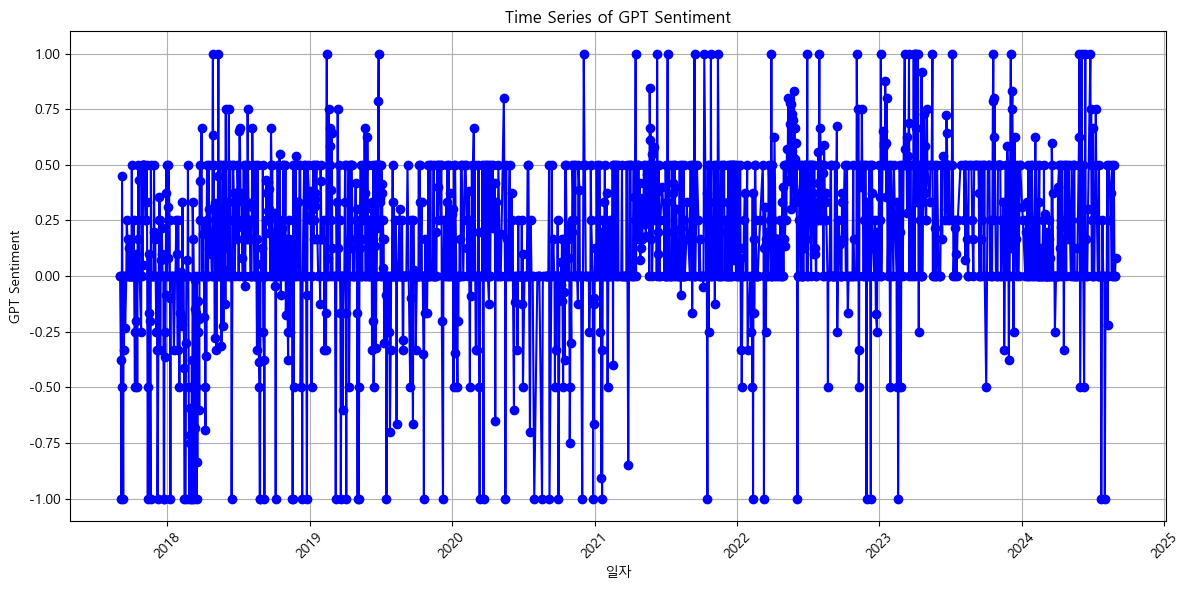

In [14]:
# 'Date' 열을 datetime 타입으로 변환
df_bigkinds.loc[:, '일자'] = pd.to_datetime(df_bigkinds['일자'])

# 날짜별로 'GPT_Sentiment'의 평균을 계산
df_bigkinds_grouped = df_bigkinds.groupby('일자')['GPT_Sentiment'].mean().reset_index()

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_bigkinds_grouped['일자'], df_bigkinds_grouped['GPT_Sentiment'], marker='o', linestyle='-', color='b')
plt.title('Time Series of GPT Sentiment')
plt.xlabel('일자')
plt.ylabel('GPT Sentiment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [15]:
df_bigkinds_avg = df_bigkinds.groupby('일자', as_index=False)['GPT_Sentiment'].mean()

# 결과 확인
df_bigkinds_avg

,일자,GPT_Sentiment
0,2017-09-01,0.000000
1,2017-09-02,0.000000
2,2017-09-04,-0.375000
3,2017-09-05,-1.000000
4,2017-09-06,-0.500000
...,...,...
1710,2024-08-23,0.000000
1711,2024-08-24,0.500000
1712,2024-08-26,0.000000
1713,2024-08-27,0.000000


In [16]:
# 감정 분석 결과 저장(일자별)
df_bigkinds_avg.to_excel('./Text_Data/bigkinds/삼성전자_정치_20170901-20240830_전처리후_Okt_chatgpt_daily.xlsx', index=False)

chatgpt의 경우 다시 평가하는 경우 비용 발생하여 기존에 평가 데이터를 필터링하여 정상 데이터만 추출

In [3]:
# EXCEL파일 읽기
file_path = './Text_Data/bigkinds/삼성전자_정치_20170901-20240830_전처리후_Okt_chatgpt.xlsx'
df_bigkinds = pd.read_excel(file_path, converters={'뉴스 식별자': str})  # '뉴스 식별자'는 해당 열의 실제 이름으로 대체

In [4]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_Okt,GPT_Sentiment,Predicted_Text
0,02100101.20170901174354001,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,"검찰,서울경찰청,국회,비서관,국정원,대법원,서울중앙지법,이화여대,국회증언감정법,청와...","불출석,최순실게이트,청문회,백수,문고리,안봉근,국정홍보비서관,이재만,총무비서관,국정...","비서관,청문회,재판부,최순실,공소사실,문고리,불출석,이화여대,삼성전자,김장자,피고인...",이른바 '문고리 3인방'으로 알려진 안봉근 전 국정홍보비서관과 이재만 전 총무비서관...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,0.0,"이 사건은 삼성과 관련된 정치적 불확실성을 증가시키고 있으며, 주가에 미치는 영향이..."
1,02100101.20170901141935001,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,"서울지방경찰청,형사12단독,검찰,국회,서울중앙지법,이화여대,청와대,국정홍보비서관,서...","두문불출,개월,문고리,실세,이재만,안봉근,법정,청문회불,출석,인정,박근혜,대통령,6...","비서관,청문회,이재만,문고리,불출석,청와대,변호인,서울중앙지법,피고인,박평수,박근혜...",박근혜 전 대통령(65 구속기소)의 '문고리 3인방'으로 불렸던 최측근 이재만 전 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
2,02100311.20170901153936001,2017-09-01,서울경제,장주영 기자,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장",정치>국회_정당,사회>사건_사고,정치>청와대,NaN,NaN,...,"형사3부,서울지방경찰청,형사12단독,검찰,국회,대법원,국정원,순천향대,특위,한국마사...","혐의,청문회,건강상태,절차적,하자,무죄,주장,국회,국정,농단,청문회,불출석,혐의,재...","청문회,청와대,비서관,국정원,요구서,건강상태,출석요구서,한국마사회,불출석,재판장,서...",지난해말 국회에서 열린 국정농단 청문회에 제멋대로 불출석한 혐의로 재판에 넘겨진 우...,http://www.sedaily.com/NewsView/1OKUY3ELL1,NaN,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장 혐의,청문회,건강상태,절...",청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,0.0,"이 텍스트는 삼성전자의 주가에 대한 명확한 긍정적 또는 부정적 영향을 주지 않으며,..."
3,02100101.20170902162415001,2017-09-02,매일경제,디지털뉴스국,서울 도심 곳곳서 태극기 집회,정치>청와대,정치>행정_자치,정치>선거,사회>사회갈등>시위,NaN,...,"정부,헌법재판소,자유한국당,태극기,대한애국당,박근혜구명총연맹,국립현대미술관,태극기혁...","서울,도심,태극기,집회,주말,도심,서울,도심,박근혜,단체들,대통령,지지,단체,태극기...","태극기,대한애국당,문재인,박근혜,서울,대한문,종로구,종로,부회장,참가자,조원진,중구...",주말인 2일 서울 도심 곳곳에서 박근혜 전 대통령 지지 단체들의 '태극기 집회'가 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"서울 도심 곳곳서 태극기 집회 서울,도심,태극기,집회,주말,도심,서울,도심,박근혜,...",서울 도심 곳곳 서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜...,0.0,"이 텍스트는 정치적 불안정성을 반영하고 있으며, 삼성전자의 주가에 중립적이거나 불확..."
4,02100101.20170904091746001,2017-09-04,매일경제,고득관,"코스피, 북핵 리스크에 2330선 `털썩`",정치>북한,정치>청와대,NaN,범죄>기업범죄>거래제한,재해>자연재해>지진,...,"미국,한국전력,국방부,국가안보회의,조선노동당,기상청,북한,국가지진화산종합상황실,유가...","코스피,리스크,2330선,북한,지정학,리스크,고조,코스피,급락세,4일,코스피,25....","코스피,미국,인공지진,5차,풍계리,함경북도,수소탄,제임스,핵무력,기상청",북한의 6차 핵실험으로 지정학적 리스크가 다시 고조되자 코스피도 급락세를 보이고 있...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"코스피, 북핵 리스크에 2330선 `털썩` 코스피,리스크,2330선,북한,지정학,리...",코스피 북핵 리스크 2330 선 털썩 코스피 리스크 2330 선 북한 지정학 리스크...,-1.0,북한의 핵실험과 지정학적 리스크가 고조되면서 삼성전자를 포함한 코스피 시장에 부정적...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,02100101.20240829144509001,2024-08-29,매일경제,이호준 매경이코노미 인턴기자(lhj0756@naver.com),재산 333억원에 페라리 소유...국회의원 재산신고 1위 누구?,정치>국회_정당,정치>선거,NaN,NaN,NaN,...,"민주당,사회민주당,국회공직자윤리위원회,조국혁신당,진보당,개혁신당,더불어민주당,페라리...","재산,페라리,소유,국회의원,재산,신고,공개,국회공직자,윤리,위원회,신규,재산,등록,...","국민의힘,1억,국회의원,배우자,페라리,26억,신고액,국회공직자윤리위원회,더불어민주당...",국회공직자윤리위원회 신규 재산 등록내역 공개 \n22대 국회 신규 등록 국회의원 \...,http://www.mk.co.kr/article/11104605,NaN,"재산 333억원에 페라리 소유...국회의원 재산신고 1위 누구? 재산,페라리,소유,...",재산 333억원 페라리 소유 국회의원 재산 신고 1 위 재산 페라리 소유 국회의원 ...,0.0,"이 텍스트는 삼성전자의 주가에 직접적인 영향을 미치지 않으며, 정치적 재산 신고와 ..."
5408,02100311.20240829000230001,2024-08-29,서울경제,김예솔 기자,신규 국회의원 평균재산 27억 고동진 333억 '최고',정치>국회_정당,정치>선거,NaN,NaN,NaN,...,"사회민주당,공직자윤리위,조국혁신당,개혁신당,더불어민주당,차남,국회,삼성전자,국민의힘","신규,국회의원,평균,재산,고동진,최고,조국,이준석,12억,나경원,59억,국회,재산,...","국민의힘,조국혁신당,나경원,12억,고동진,이준석,서울,방배동,국회의원,삼성전자,의원들",22대 국회에 새로 재산 등록을 마친 의원 147명 가운데 최고 자산가는 삼성전자 ...,http://www.sedaily.com/NewsView/2DD7CNUYYS,NaN,"신규 국회의원 평균재산 27억 고동진 333억 '최고' 신규,국회의원,평균,재산,고...",신규 국회의원 평균 재산 27억 고동진 333억 최고 신규 국회의원 평균 재산 고동...,0.0,"이 텍스트는 삼성전자의 주가에 직접적인 영향을 미치지 않으며, 정치적 재산 등록 정...

In [7]:
# 뉴스 식별자 컬럼에서 '.' 이후의 값만 조회
df_bigkinds['뉴스 식별자'] = df_bigkinds['뉴스 식별자'].str.split('.').str[1]

분석제외 대상과 중복건 제거

In [10]:
df_bigkinds = df_bigkinds[df_bigkinds['분석제외 여부'].isnull()]

In [12]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_Okt,GPT_Sentiment,Predicted_Text
0,20170901174354001,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,"검찰,서울경찰청,국회,비서관,국정원,대법원,서울중앙지법,이화여대,국회증언감정법,청와...","불출석,최순실게이트,청문회,백수,문고리,안봉근,국정홍보비서관,이재만,총무비서관,국정...","비서관,청문회,재판부,최순실,공소사실,문고리,불출석,이화여대,삼성전자,김장자,피고인...",이른바 '문고리 3인방'으로 알려진 안봉근 전 국정홍보비서관과 이재만 전 총무비서관...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,0.0,"이 사건은 삼성과 관련된 정치적 불확실성을 증가시키고 있으며, 주가에 미치는 영향이..."
1,20170901141935001,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,"서울지방경찰청,형사12단독,검찰,국회,서울중앙지법,이화여대,청와대,국정홍보비서관,서...","두문불출,개월,문고리,실세,이재만,안봉근,법정,청문회불,출석,인정,박근혜,대통령,6...","비서관,청문회,이재만,문고리,불출석,청와대,변호인,서울중앙지법,피고인,박평수,박근혜...",박근혜 전 대통령(65 구속기소)의 '문고리 3인방'으로 불렸던 최측근 이재만 전 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
2,20170901153936001,2017-09-01,서울경제,장주영 기자,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장",정치>국회_정당,사회>사건_사고,정치>청와대,NaN,NaN,...,"형사3부,서울지방경찰청,형사12단독,검찰,국회,대법원,국정원,순천향대,특위,한국마사...","혐의,청문회,건강상태,절차적,하자,무죄,주장,국회,국정,농단,청문회,불출석,혐의,재...","청문회,청와대,비서관,국정원,요구서,건강상태,출석요구서,한국마사회,불출석,재판장,서...",지난해말 국회에서 열린 국정농단 청문회에 제멋대로 불출석한 혐의로 재판에 넘겨진 우...,http://www.sedaily.com/NewsView/1OKUY3ELL1,NaN,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장 혐의,청문회,건강상태,절...",청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,0.0,"이 텍스트는 삼성전자의 주가에 대한 명확한 긍정적 또는 부정적 영향을 주지 않으며,..."
3,20170902162415001,2017-09-02,매일경제,디지털뉴스국,서울 도심 곳곳서 태극기 집회,정치>청와대,정치>행정_자치,정치>선거,사회>사회갈등>시위,NaN,...,"정부,헌법재판소,자유한국당,태극기,대한애국당,박근혜구명총연맹,국립현대미술관,태극기혁...","서울,도심,태극기,집회,주말,도심,서울,도심,박근혜,단체들,대통령,지지,단체,태극기...","태극기,대한애국당,문재인,박근혜,서울,대한문,종로구,종로,부회장,참가자,조원진,중구...",주말인 2일 서울 도심 곳곳에서 박근혜 전 대통령 지지 단체들의 '태극기 집회'가 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"서울 도심 곳곳서 태극기 집회 서울,도심,태극기,집회,주말,도심,서울,도심,박근혜,...",서울 도심 곳곳 서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜...,0.0,"이 텍스트는 정치적 불안정성을 반영하고 있으며, 삼성전자의 주가에 중립적이거나 불확..."
4,20170904091746001,2017-09-04,매일경제,고득관,"코스피, 북핵 리스크에 2330선 `털썩`",정치>북한,정치>청와대,NaN,범죄>기업범죄>거래제한,재해>자연재해>지진,...,"미국,한국전력,국방부,국가안보회의,조선노동당,기상청,북한,국가지진화산종합상황실,유가...","코스피,리스크,2330선,북한,지정학,리스크,고조,코스피,급락세,4일,코스피,25....","코스피,미국,인공지진,5차,풍계리,함경북도,수소탄,제임스,핵무력,기상청",북한의 6차 핵실험으로 지정학적 리스크가 다시 고조되자 코스피도 급락세를 보이고 있...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"코스피, 북핵 리스크에 2330선 `털썩` 코스피,리스크,2330선,북한,지정학,리...",코스피 북핵 리스크 2330 선 털썩 코스피 리스크 2330 선 북한 지정학 리스크...,-1.0,북한의 핵실험과 지정학적 리스크가 고조되면서 삼성전자를 포함한 코스피 시장에 부정적...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,20240829144509001,2024-08-29,매일경제,이호준 매경이코노미 인턴기자(lhj0756@naver.com),재산 333억원에 페라리 소유...국회의원 재산신고 1위 누구?,정치>국회_정당,정치>선거,NaN,NaN,NaN,...,"민주당,사회민주당,국회공직자윤리위원회,조국혁신당,진보당,개혁신당,더불어민주당,페라리...","재산,페라리,소유,국회의원,재산,신고,공개,국회공직자,윤리,위원회,신규,재산,등록,...","국민의힘,1억,국회의원,배우자,페라리,26억,신고액,국회공직자윤리위원회,더불어민주당...",국회공직자윤리위원회 신규 재산 등록내역 공개 \n22대 국회 신규 등록 국회의원 \...,http://www.mk.co.kr/article/11104605,NaN,"재산 333억원에 페라리 소유...국회의원 재산신고 1위 누구? 재산,페라리,소유,...",재산 333억원 페라리 소유 국회의원 재산 신고 1 위 재산 페라리 소유 국회의원 ...,0.0,"이 텍스트는 삼성전자의 주가에 직접적인 영향을 미치지 않으며, 정치적 재산 신고와 ..."
5408,20240829000230001,2024-08-29,서울경제,김예솔 기자,신규 국회의원 평균재산 27억 고동진 333억 '최고',정치>국회_정당,정치>선거,NaN,NaN,NaN,...,"사회민주당,공직자윤리위,조국혁신당,개혁신당,더불어민주당,차남,국회,삼성전자,국민의힘","신규,국회의원,평균,재산,고동진,최고,조국,이준석,12억,나경원,59억,국회,재산,...","국민의힘,조국혁신당,나경원,12억,고동진,이준석,서울,방배동,국회의원,삼성전자,의원들",22대 국회에 새로 재산 등록을 마친 의원 147명 가운데 최고 자산가는 삼성전자 ...,http://www.sedaily.com/NewsView/2DD7CNUYYS,NaN,"신규 국회의원 평균재산 27억 고동진 333억 '최고' 신규,국회의원,평균,재산,고...",신규 국회의원 평균 재산 27억 고동진 333억 최고 신규 국회의원 평균 재산 고동...,0.0,"이 텍스트는 삼성전자의 주가에 직접적인 영향을 미치지 않으며, 정치적 재산 등록 정..."
5409,20240829070127001,2024-08-29,서울경제,전희윤 기자,22대 국회 신규등록 최고 

뉴스 식별자 최소값 기준으로 제목_키워드_전처리후 그룹핑

In [15]:
# 그룹핑할 컬럼 리스트
group_columns = ['제목_키워드_전처리후_Okt']

# 각 그룹에서 뉴스 식별자 컬럼의 최소값을 유지
df_bigkinds2 = df_bigkinds.groupby(group_columns, as_index=False).agg({'뉴스 식별자': 'min'})

In [17]:
df_bigkinds2

,제목_키워드_전처리후_Okt,뉴스 식별자
0,- 8 대 그룹 내일 간담 회 무기한 연기 적절한 시기 재 추진 8 대 그룹 재 추...,20171219134824002
1,- 관계 개선 수혜 강세 화장품 여행 매수 기회 테마 섹터 수혜 개선 강세 화장품 ...,20171129112950001
2,- 네덜란드 반도체 AI 기술 협력 네덜란드 반도체 AI 기술 협력 윤석열 대통령 ...,20221117184706001
3,- 만날까 리룡남 부총리 나이지리아 방문 길 베이징 경유 리룡남 부총리 나이지리아 ...,20190608162001001
4,- 바이든 만찬 10 대 그룹 총수 총 출동 만찬 10 대 그룹 총수 21일 국립 ...,20220518171014001
...,...,...
4945,후보 누군지 잘 몰라요 유권자 평균 나이 34 세인 경기도 마을 아직 은 낯선 3 ...,20240314154003001
4946,후시 황 한반도 지정학적 리스크 고조 에도 코스피 는 굳건 한반도 지정학 리스크 고...,20200617140645001
4947,흑석 김 의겸 매입 했다는 서초 우면동 투자 가치 는 흑석 김 의겸 매입 서초 우면...,20210702153458002
4948,흙 수저 의원 좋은 일자리 기회 사다리 흙 수저 의원 일자리 기회 사다리 광주 여상...,20201007175758001


In [19]:
# 필요한 컬럼만 선택하여 두 데이터프레임 병합
big_kinds_sentiment = pd.merge(
    df_bigkinds[['제목_키워드_전처리후_Okt', '뉴스 식별자','일자','GPT_Sentiment','Predicted_Text']],
    df_bigkinds2[['제목_키워드_전처리후_Okt', '뉴스 식별자']],
    on=['제목_키워드_전처리후_Okt', '뉴스 식별자'],
    how='inner'
)

big_kinds_sentiment = big_kinds_sentiment[['뉴스 식별자', '일자', '제목_키워드_전처리후_Okt', 'GPT_Sentiment', 'Predicted_Text']]
big_kinds_sentiment

,뉴스 식별자,일자,제목_키워드_전처리후_Okt,GPT_Sentiment,Predicted_Text
0,20170901174354001,2017-09-01,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,0.0,"이 사건은 삼성과 관련된 정치적 불확실성을 증가시키고 있으며, 주가에 미치는 영향이..."
1,20170901141935001,2017-09-01,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
2,20170901153936001,2017-09-01,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,0.0,"이 텍스트는 삼성전자의 주가에 대한 명확한 긍정적 또는 부정적 영향을 주지 않으며,..."
3,20170902162415001,2017-09-02,서울 도심 곳곳 서 태극기 집회 서울 도심 태극기 집회 주말 도심 서울 도심 박근혜...,0.0,"이 텍스트는 정치적 불안정성을 반영하고 있으며, 삼성전자의 주가에 중립적이거나 불확..."
4,20170904091746001,2017-09-04,코스피 북핵 리스크 2330 선 털썩 코스피 리스크 2330 선 북한 지정학 리스크...,-1.0,북한의 핵실험과 지정학적 리스크가 고조되면서 삼성전자를 포함한 코스피 시장에 부정적...
...,...,...,...,...,...
4945,20240829144509001,2024-08-29,재산 333억원 페라리 소유 국회의원 재산 신고 1 위 재산 페라리 소유 국회의원 ...,0.0,"이 텍스트는 삼성전자의 주가에 직접적인 영향을 미치지 않으며, 정치적 재산 신고와 ..."
4946,20240829000230001,2024-08-29,신규 국회의원 평균 재산 27억 고동진 333억 최고 신규 국회의원 평균 재산 고동...,0.0,"이 텍스트는 삼성전자의 주가에 직접적인 영향을 미치지 않으며, 정치적 재산 등록 정..."
4947,20240829070127001,2024-08-29,22 대 국회 신규 등록 최고 부자 는 333억 고동진 조국 52억 이준석 12억 ...,0.0,"이 텍스트는 삼성전자의 주가에 대한 긍정적이거나 부정적인 신호를 제공하지 않으며, ..."
4948,20240829002204001,2024-08-29,333억 고동진 22 대 초선 재산 1 위 333억 고동진 초선 재산 국회 입성 국...,0.0,이 텍스트는 삼성전자의 주가에 대한 직접적인 긍정적 또는 부정적 영향을 미치지 않으...


In [21]:
big_kinds_sentiment.to_excel('./Text_Data/bigkinds/삼성전자_정치_20170901-20240830_전처리후_Okt_chatgpt_filter.xlsx', index=False)

In [23]:
big_kinds_sentiment_avg = big_kinds_sentiment.groupby('일자', as_index=False)['GPT_Sentiment'].mean()
# 소수점 1자리로 반올림
big_kinds_sentiment_avg['GPT_Sentiment'] = big_kinds_sentiment_avg['GPT_Sentiment'].round(1)
big_kinds_sentiment_avg['GPT_Sentiment'] = big_kinds_sentiment_avg['GPT_Sentiment'].apply(lambda x: 0 if x == -0.0 else x)
# 결과 확인
big_kinds_sentiment_avg

,일자,GPT_Sentiment
0,2017-09-01,0.0
1,2017-09-02,0.0
2,2017-09-04,-0.4
3,2017-09-05,-1.0
4,2017-09-06,-0.5
...,...,...
1648,2024-08-23,0.0
1649,2024-08-24,0.5
1650,2024-08-26,0.0
1651,2024-08-27,0.0


In [25]:
# 감정 분석 결과 저장(일자별)
big_kinds_sentiment_avg.to_excel('./Text_Data/bigkinds/삼성전자_정치_20170901-20240830_전처리후_Okt_chatgpt_daily_filter.xlsx', index=False)